In [1]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_ar = []
for f in glob.glob('result_data/*.out'):
    name = re.match(r'result_data/timedemo_result_(.*)\.out', f)[1]
    with open(f) as file:
        frame = 0
        for line in file:
            line = line.strip()
            if re.match('\d+,', line):
                time, reason = line.split(',')
                time = int(time)
                frame += 1
                data_ar.append({
                    'frame': frame,
                    'name': name,
                    'time': time,
                    'reason': reason
                })
                
data = pd.DataFrame(data_ar)
data

,frame,name,time,reason
0,1,only_render,36138,wipe
1,2,only_render,6103,wipe
2,3,only_render,8591,wipe
3,4,only_render,9337,wipe
4,5,only_render,11649,wipe
...,...,...,...,...
15985,1226,all_contracts,1095702,gamestate 0
15986,1227,all_contracts,1094051,gamestate 0
15987,1228,all_contracts,1096194,gamestate 0
15988,1229,all_contracts,1091324,gamestate 0


In [3]:
data.groupby('name').count()

,frame,time,reason
name,,,
all_contracts,1230,1230,1230
check_void,1230,1230,1230
ded_no_contracts,1230,1230,1230
ded_no_contracts_keep,1230,1230,1230
dont_check_void,1230,1230,1230
no_contracts,1230,1230,1230
no_contracts_keep,1230,1230,1230
only_math,1230,1230,1230
only_pointers,1230,1230,1230


<AxesSubplot:xlabel='frame'>

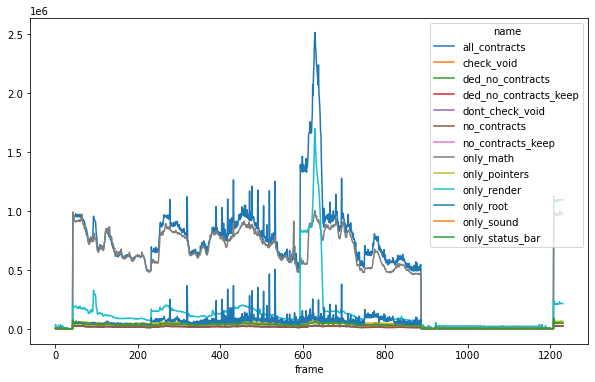

In [4]:
df = data.pivot(values='time', columns=['name'], index='frame')
df.plot(figsize=(10, 6))

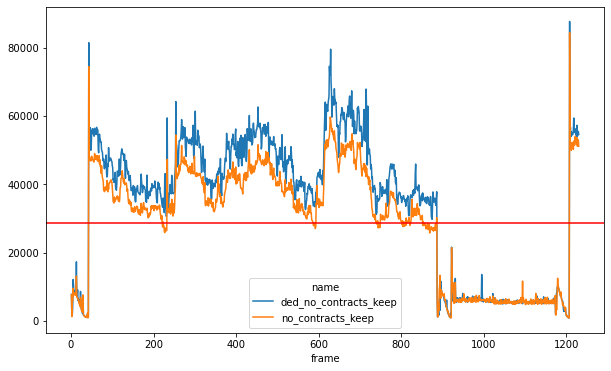

In [5]:
df = data[(data['name'] == 'no_contracts_keep') | (data['name'] == 'ded_no_contracts_keep')]
df = df.pivot(values='time', columns=['name'], index='frame')
df.plot(figsize=(10, 6))
plt.axhline(y=1.0 / 35 * (10 ** 6), color='red')

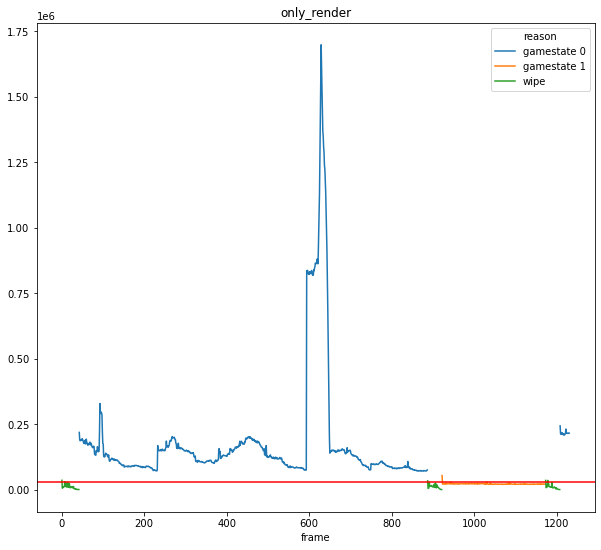

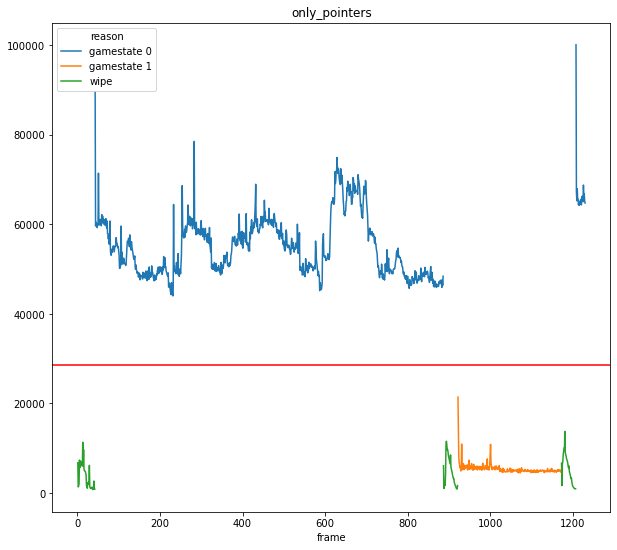

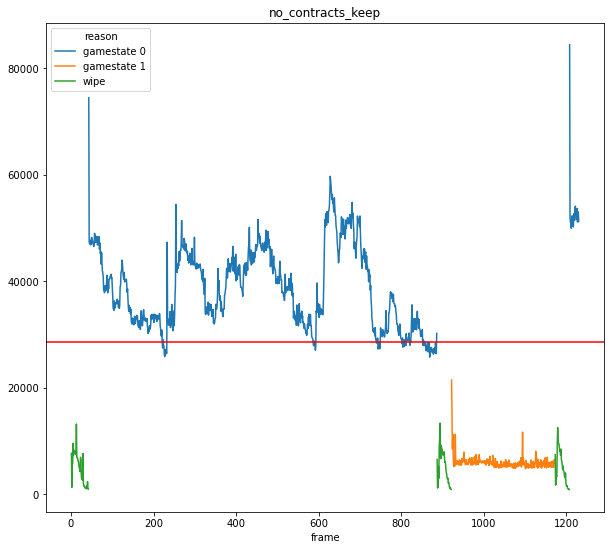

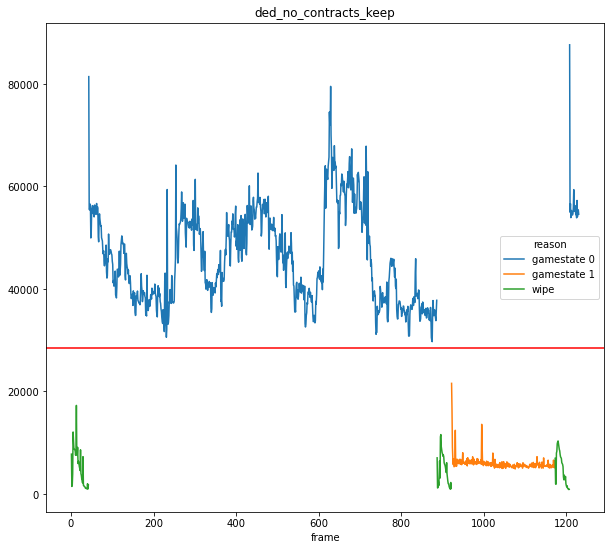

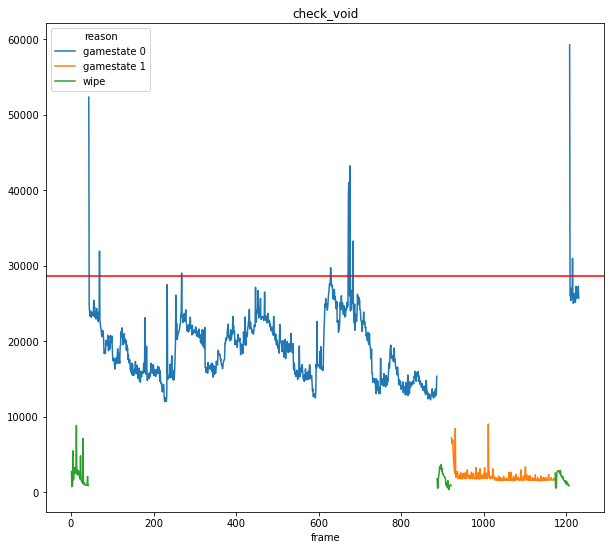

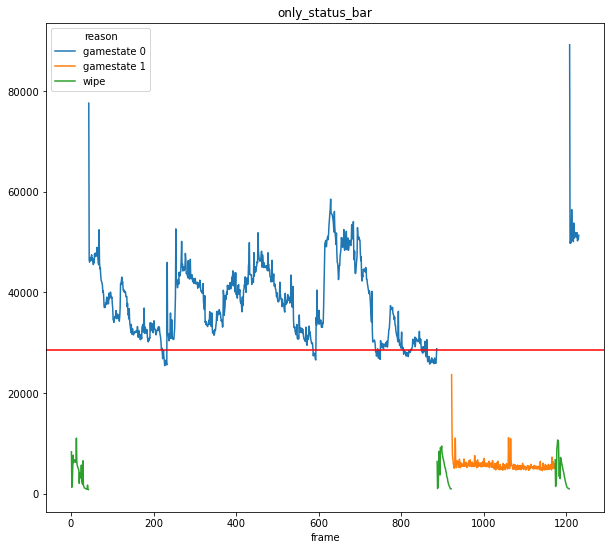

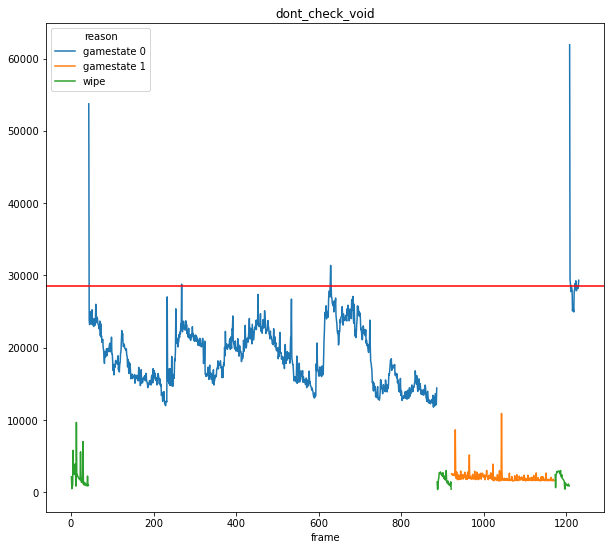

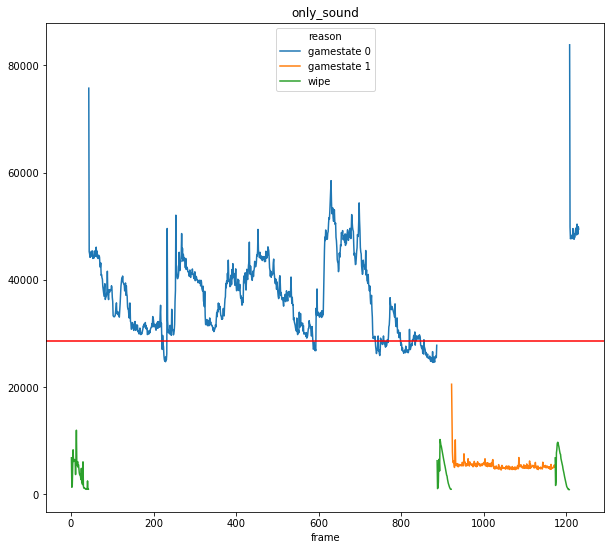

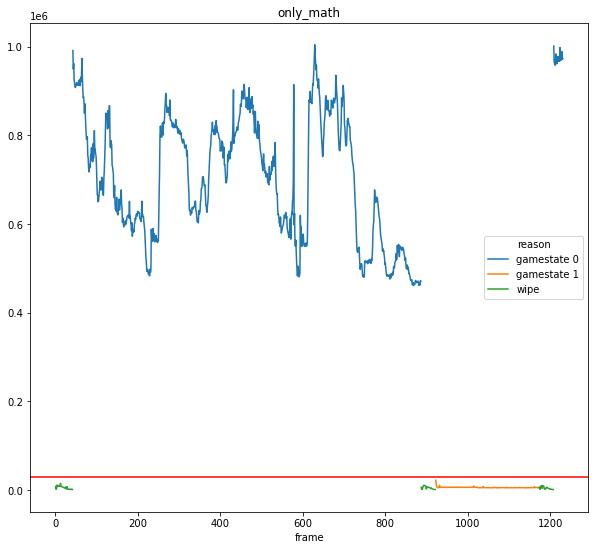

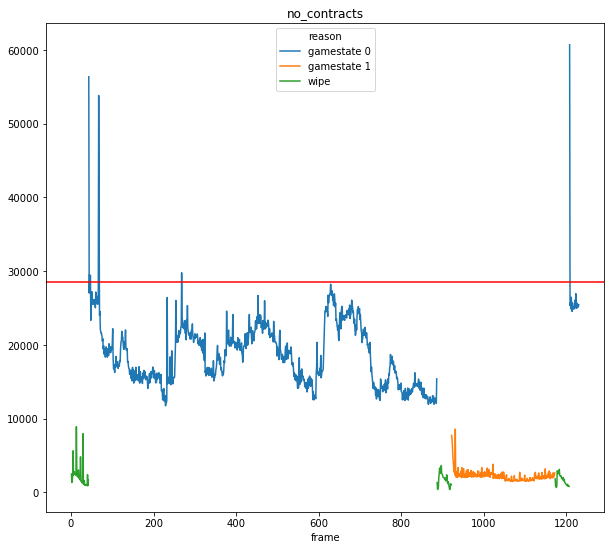

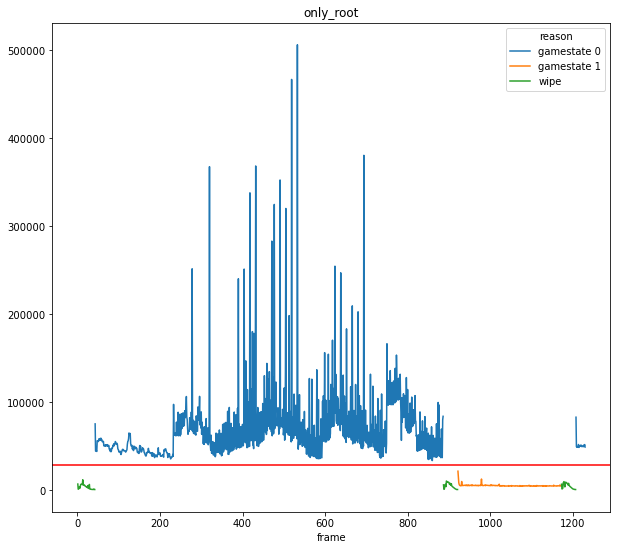

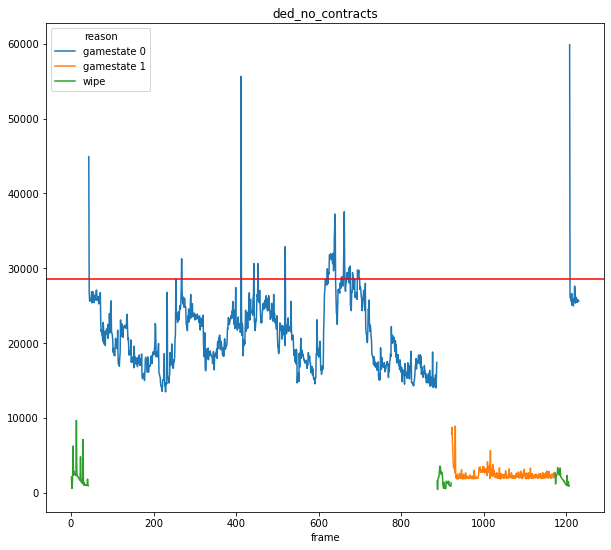

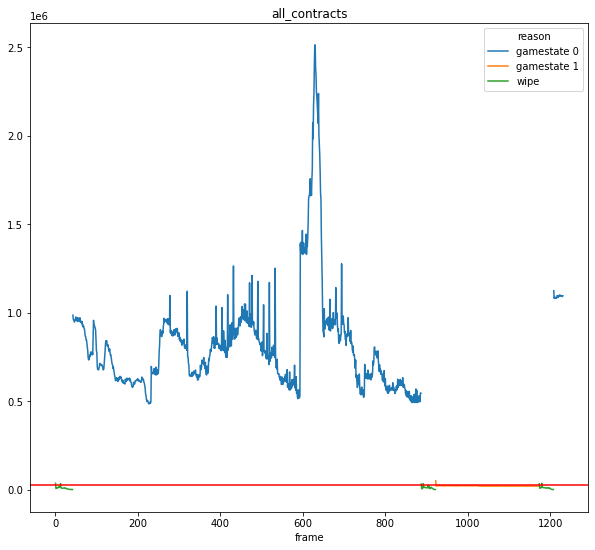

In [6]:
for name in data.name.unique():
    df = data[data['name'] == name]
    df = df.pivot(values='time', columns=['reason'], index='frame')
    df.plot(figsize=(10, 9), title=name)
    plt.axhline(y=1.0 / 35 * (10 ** 6), color='red')

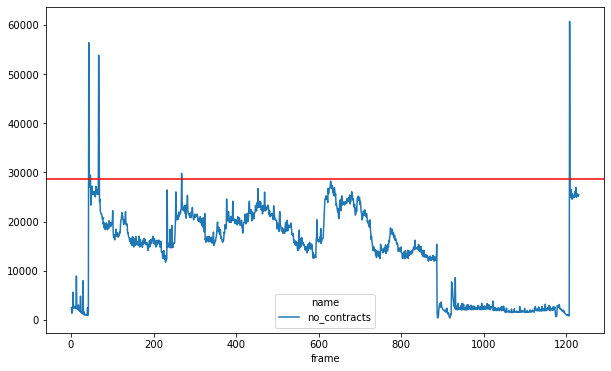

In [7]:
fast = 'no_contracts'
df = data[data['name'] == fast]
df = df.pivot(values='time', columns=['name'], index='frame')
df.plot(figsize=(10, 6))
plt.axhline(y=1.0 / 35 * (10 ** 6), color='red')

In [8]:
# Actual fps
df = data[data['reason'] == 'gamestate 0'].groupby('name').mean('time').reset_index()
df['fps'] = 1 / df['time'] * (10 ** 6)
df = df.append(pd.DataFrame([{'name': 'original', 'fps': 35}]))
df = df[['name', 'fps']].sort_values('fps')
df

,name,fps
0,all_contracts,1.225223
7,only_math,1.416151
9,only_render,5.528709
10,only_root,14.307220
8,only_pointers,18.120887
3,ded_no_contracts_keep,21.631024
6,no_contracts_keep,25.702353
12,only_status_bar,26.202871
11,only_sound,27.143347
0,original,35.000000


<AxesSubplot:xlabel='name'>

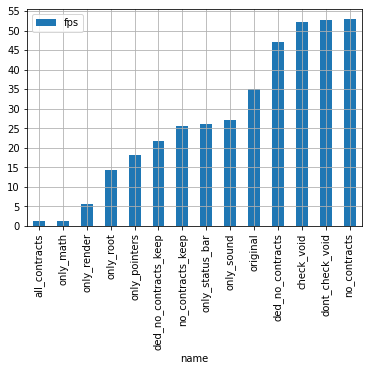

In [9]:
df.plot.bar(x='name', yticks=range(0, 60, 5), grid=True)